## scikit learn

In [89]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import (
    HistGradientBoostingRegressor,
    GradientBoostingRegressor, 
    RandomForestRegressor
)
import joblib

In [42]:

import torch

cuda_available = torch.cuda.is_available()
print("CUDA available:", cuda_available)

CUDA available: True


In [57]:
housing = datasets.fetch_california_housing()
df=housing

In [10]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
print(housing.target_names)

['MedHouseVal']


In [60]:
dataset=pd.DataFrame(df.data,columns=df.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<Axes: >

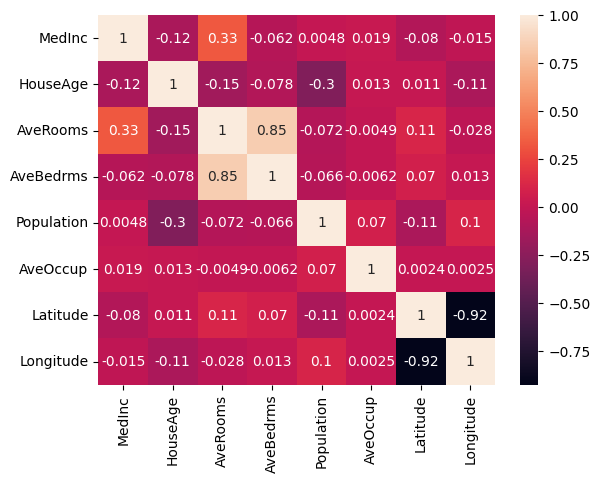

In [72]:
sns.heatmap(dataset.corr(),annot=True)

In [12]:
x = housing.data
y = housing.target

In [13]:
print("nuber of rows:", len(x))
print("nuber of columns:", len(housing.feature_names))

nuber of rows: 20640
nuber of columns: 8


In [14]:
print(x[0])
print(y[0])

[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
4.526


In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2,
    random_state=432
    )

In [16]:
print("number of train samples:", len(x_train))
print("number of test samples:", len(x_test))

number of train samples: 16512
number of test samples: 4128


In [17]:
print(x_train[0])
print(y_train[0])

[   2.1442       52.            3.94886364    1.03693182  921.
    2.61647727   37.34       -121.88      ]
1.889


In [69]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [73]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [74]:
x_test

array([[ 0.65250483,  1.85766422,  0.07256328, ..., -0.05704041,
         0.99443665, -1.32609277],
       [-0.7058722 ,  1.61915288, -0.4763554 , ..., -0.07767449,
         1.01317958, -1.33108446],
       [ 0.9870317 , -1.5609984 ,  0.13534168, ..., -0.00498174,
        -0.75334213,  1.1298155 ],
       ...,
       [-0.160963  ,  0.66510749, -0.44749835, ..., -0.09655544,
         1.09283706, -1.47584328],
       [-0.35423466, -0.60695302,  0.047848  , ..., -0.05127177,
         1.1396944 , -0.85687453],
       [-0.44547404, -1.08397571, -0.43317696, ...,  0.061111  ,
        -0.73459919,  0.79537271]])

In [75]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)

print('r2 score:', r2)

r2 score: 0.6080229586580415


In [20]:
# baseline
# r2 score: 0.6080229586580355

### Optimize Features

In [21]:
print("old number of features:", len(x_train[0]))

old number of features: 8


In [77]:
poly = PolynomialFeatures()
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

In [78]:
print("new number of features:", len(x_train[0]))

new number of features: 45


In [80]:
model.fit(x_train, y_train) # train
y_pred = model.predict(x_test) # test
r2 = r2_score(y_test, y_pred) # evaluate

print("new R2 score:", r2)

new R2 score: 0.6610240206131763


### Optimize Algorithms

In [81]:
# initialize models
LR = LinearRegression()
GBR = GradientBoostingRegressor()
RFR = RandomForestRegressor()

In [26]:
for model in [LR, GBR, RFR]:
    model.fit(x_train, y_train) # train
    y_pred = model.predict(x_test) # test
    r2 = r2_score(y_test, y_pred) # evaluate
    print("Model:", model)
    print("R2 score:", r2)
    print("-------------")

Model: LinearRegression()
R2 score: 0.6610240206255689
-------------
Model: GradientBoostingRegressor()
R2 score: 0.7919039348283619
-------------
Model: RandomForestRegressor()
R2 score: 0.8041672628142349
-------------


### Optimize Algorithm Speed

In [27]:
GBR = HistGradientBoostingRegressor()
RFR = RandomForestRegressor(
    n_jobs=-1
)

In [28]:
for model in [GBR, RFR]:
    model.fit(x_train, y_train) # train
    y_pred = model.predict(x_test) # test
    r2 = r2_score(y_test, y_pred) # evaluate
    print("Model:", model)
    print("R2 score:", r2)
    print("-------------")

Model: HistGradientBoostingRegressor()
R2 score: 0.837104386407454
-------------
Model: RandomForestRegressor(n_jobs=-1)
R2 score: 0.8055043719280665
-------------


### Optimize Hyperparameters

In [29]:
for i in [100, 200, 300, 400, 500]:
    model = HistGradientBoostingRegressor(
        max_iter=i
    )
    model.fit(x_train, y_train) # train
    y_pred = model.predict(x_test) # test
    r2 = r2_score(y_test, y_pred) # evaluate
    print("Number of trees:", i)
    print("R2 score:", r2)
    print("-------------")

Number of trees: 100
R2 score: 0.8342727515210979
-------------
Number of trees: 200
R2 score: 0.843238173724869
-------------
Number of trees: 300
R2 score: 0.842907728765643
-------------
Number of trees: 400
R2 score: 0.8448521473591777
-------------
Number of trees: 500
R2 score: 0.8418768502889229
-------------


In [30]:
for j in [0.1, 0.05, 0.001]:   
    for i in [100, 200, 300, 400, 500]:
        model = HistGradientBoostingRegressor(
            max_iter=i,
            learning_rate=j
        )
        model.fit(x_train, y_train) # train
        y_pred = model.predict(x_test) # test
        r2 = r2_score(y_test, y_pred) # evaluate
        print("Learning rate:", j)
        print("Number of trees:", i)
        print("R2 score:", r2)
        print("-------------")

Learning rate: 0.1
Number of trees: 100
R2 score: 0.8375483927144102
-------------
Learning rate: 0.1
Number of trees: 200
R2 score: 0.8431704812654444
-------------
Learning rate: 0.1
Number of trees: 300
R2 score: 0.8456312346285246
-------------
Learning rate: 0.1
Number of trees: 400
R2 score: 0.845971035291839
-------------
Learning rate: 0.1
Number of trees: 500
R2 score: 0.8444127591309036
-------------
Learning rate: 0.05
Number of trees: 100
R2 score: 0.8230847698576756
-------------
Learning rate: 0.05
Number of trees: 200
R2 score: 0.839234867934548
-------------
Learning rate: 0.05
Number of trees: 300
R2 score: 0.8437637459287745
-------------
Learning rate: 0.05
Number of trees: 400
R2 score: 0.8435826477359505
-------------
Learning rate: 0.05
Number of trees: 500
R2 score: 0.8421142987166318
-------------
Learning rate: 0.001
Number of trees: 100
R2 score: 0.11992877625756304
-------------
Learning rate: 0.001
Number of trees: 200
R2 score: 0.2190139847545306
----------

### Model saving

Best parameters:

max_iter=500

learning_rate=0.05

In [82]:
model = HistGradientBoostingRegressor(
    max_iter=500,
    learning_rate=0.05
)
model.fit(x_train, y_train)

joblib.dump(model, "my_model.joblib")

['my_model.joblib']

In [83]:
# evaluate existing model
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("existing model score:", r2)

existing model score: 0.8395563865110544


In [33]:
saved_model = joblib.load("my_model.joblib")

y_pred = saved_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("saved model score:", r2)

saved model score: 0.8437721613505499


### TODOs:
- try optimizing more than 2 hyperparameters, reaching scores above 86%
- instead of simply printing the R2 scores, try visualising them with Pandas or Matplotlib
- Find even better algorithms that outperform HistGradientBoostingRegressor
- Find a different dataset and analyze it like we've analyzed this one.

In [54]:
model = HistGradientBoostingRegressor(
    max_iter=500,
    learning_rate=0.05,
    l2_regularization=0.1,
    max_bins=240,
    random_state=42,
    verbose=1,
    
)
model.fit(x_train, y_train)

joblib.dump(model, "my_model.joblib")

Binning 0.005 GB of training data: 0.043 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
Fit 314 trees in 0.853 s, (9734 total leaves)
Time spent computing histograms: 0.213s
Time spent finding best splits:  0.151s
Time spent applying splits:      0.182s
Time spent predicting:           0.009s


['my_model.joblib']

In [55]:
# evaluate existing model
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("existing model score:", r2)

existing model score: 0.8466011799528852


In [ ]:
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import HistGradientBoostingRegressor

# 1) Temel modelinizi eğitin
model = HistGradientBoostingRegressor(
    max_iter=500,
    learning_rate=0.05,
    l2_regularization=0.1,
    random_state=42,
    verbose=1,
    
)
base= model.fit(x_train, y_train)

# 2) Train set üzerindeki tahminleri alın
pred_base_train = base.predict(x_train)

# 3) Isotonic regresyon ile bu tahminleri “düzeltin”
iso = IsotonicRegression(out_of_bounds='clip')
iso.fit(pred_base_train, y_train)

# 4) Test seti için nihai tahmin
pred_base_test = base.predict(x_test)
preds_calibrated = iso.predict(pred_base_test)



Binning 0.005 GB of training data: 0.043 s
Binning 0.001 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
Fit 283 trees in 0.767 s, (8773 total leaves)
Time spent computing histograms: 0.204s
Time spent finding best splits:  0.137s
Time spent applying splits:      0.153s
Time spent predicting:           0.010s


In [86]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# 1) Parametre ızgarası
param_grid = {
    "max_iter": [100, 200, 300, 400, 500],
    "learning_rate": [0.1, 0.05, 0.001],
    "max_depth": [None, 3, 5],
    "l2_regularization": [0.0, 0.1, 1.0],
    "max_bins": [64, 128, 255]
}

# 2) GridSearchCV 
grid = GridSearchCV(
    HistGradientBoostingRegressor(random_state=42, early_stopping=True),
    param_grid=param_grid,
    cv=5,                
    scoring="r2",       
    n_jobs=-1,           
    verbose=2
)


grid.fit(x_train, y_train)


print("En iyi skor (CV):", grid.best_score_)
print("En iyi parametreler:", grid.best_params_)


best_model = grid.best_estimator_


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
En iyi skor (CV): 0.8371937899266244
En iyi parametreler: {'l2_regularization': 1.0, 'learning_rate': 0.05, 'max_bins': 255, 'max_depth': None, 'max_iter': 500}


In [ ]:
results = pd.DataFrame(grid.cv_results_)[
    ["param_max_iter","param_learning_rate","param_max_depth","mean_test_score"]
]
#  pivot ve ısıl harita (heatmap) için:
pivot = results.pivot_table(
    index="param_max_iter",
    columns="param_learning_rate",
    values="mean_test_score"
)
print("\nR² skor pivot tablosu:\n", pivot)


R² skor pivot tablosu:
 param_learning_rate     0.001     0.050     0.100
param_max_iter                                   
100                  0.109990  0.790977  0.814485
200                  0.201997  0.815233  0.826192
300                  0.278917  0.823058  0.829650
400                  0.343502  0.826745  0.830849
500                  0.397796  0.828771  0.831204


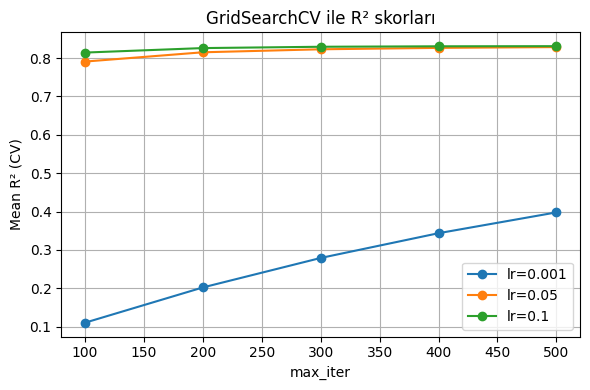

In [90]:
plt.figure(figsize=(6,4))
for lr in pivot.columns:
    plt.plot(pivot.index.astype(int), pivot[lr], marker='o', label=f"lr={lr}")
plt.title("GridSearchCV ile R² skorları")
plt.xlabel("max_iter")
plt.ylabel("Mean R² (CV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4), 
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
model.fit(x_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1, n_estimators=200, random_state=42)

In [ ]:

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("existing model score:", r2)

existing model score: 0.5971124541321519
